
## Types de Données et Valeurs Manquantes ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  30000 non-null  object
 1   step            30000 non-null  int64 
 2   type            30000 non-null  object
 3   amount          30000 non-null  int64 
 4   customer_id     30000 non-null  object
 5   age             30000 non-null  int64 
 6   is_fraud        30000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.6+ MB
None

## Nombre de vide dans le dataframe ##
transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
is_fraud          0
dtype: int64

## Nombre de dupliqués dans le dataframe ##
0

## Statistiques Descriptives des Variables Numériques ##
               step        amount           age      is_fraud
count  30000.000000  3.000000e+04  

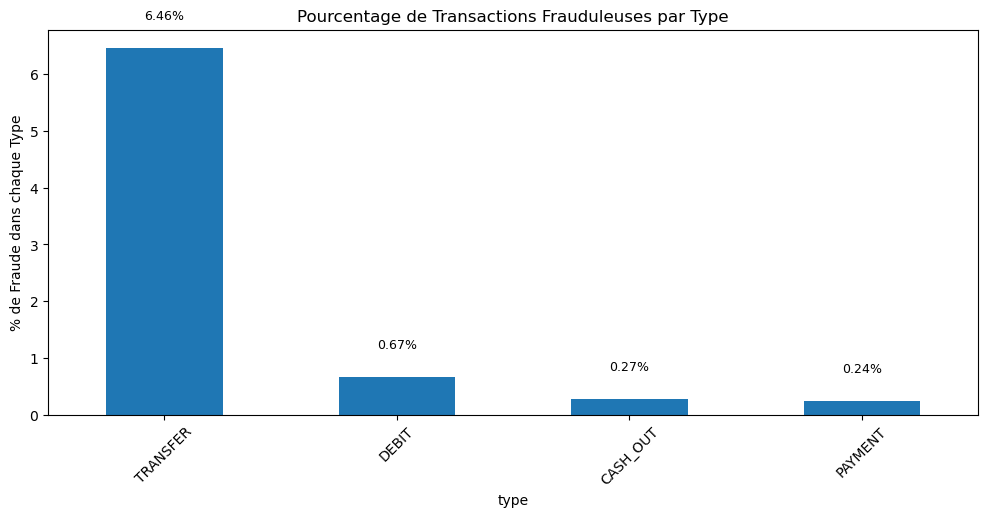


## 4. Feature Engineering Temporel ##


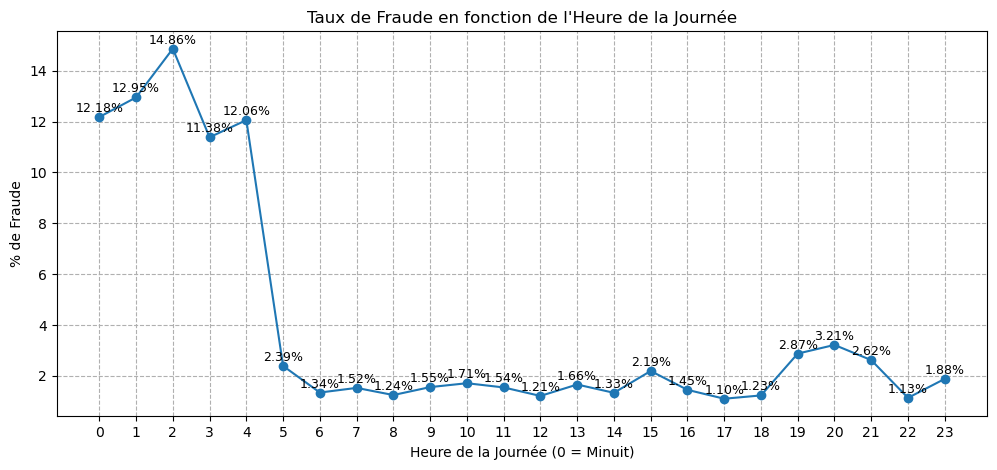

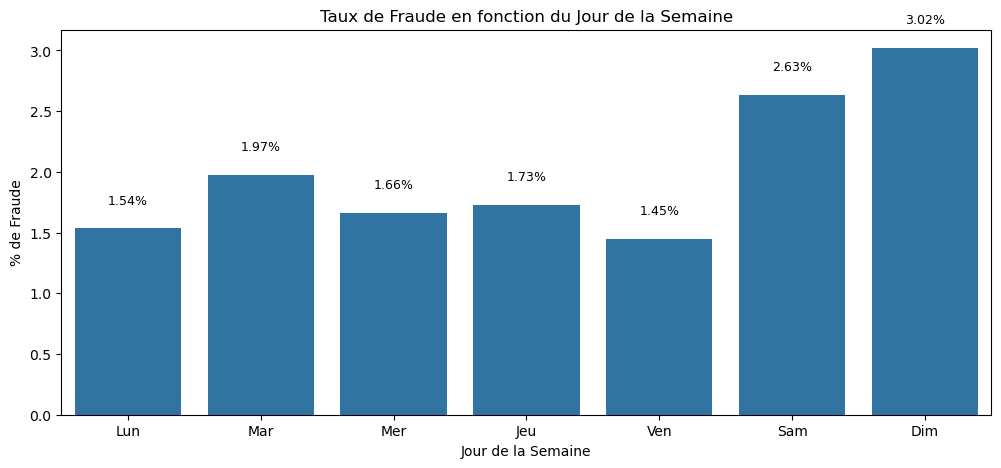

In [ ]:
# =============================================================================
# TITRE : DETECTION DE FRAUDE - POKETRAFINDAY
# AUTEUR : Équipe FiAZo Ri MiMi
# CONTEXTE : Examen Final - Prédiction de la cible 'is_fraud'
# SLOGAN : Until we die
# =============================================================================

#EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de Pandas pour afficher plus de colonnes
pd.set_option('display.max_columns', 100)

# Chargement du dataset d'entraînement
df = pd.read_csv("resources/train.csv")

print("\n## Types de Données et Valeurs Manquantes ##")
print(df.info())
print("\n## Nombre de vide dans le dataframe ##")
print(df.isna().sum())
print("\n## Nombre de dupliqués dans le dataframe ##")
print(df.duplicated().sum())

print("\n## Statistiques Descriptives des Variables Numériques ##")
print(df.describe())

print("\n## Type de Transaction vs. Fraude")

# Nombre de transactions par type
print("Nombre de transactions par Type :")
print(df['type'].value_counts())

# Pourcentage de fraude par Type
type_fraud_pivot = pd.crosstab(df['type'], df['is_fraud'], normalize='index') * 100
print("\nPourcentage de Fraude (1) par Type de Transaction :")
print(type_fraud_pivot[1].sort_values(ascending=False))

# Visualisation (focus sur la colonne 1: is_fraud=1)
plt.figure(figsize=(12, 5))
ax = type_fraud_pivot[1].sort_values(ascending=False).plot(kind='bar')

plt.title('Pourcentage de Transactions Frauduleuses par Type')
plt.ylabel('% de Fraude dans chaque Type')
plt.xticks(rotation=45)

# Ajout des étiquettes
for i, value in enumerate(type_fraud_pivot[1].sort_values(ascending=False)):
    ax.text(i, value + 0.5, f"{value:.2f}%", ha='center', fontsize=9)

plt.show()



print("\n## Feature Engineering Temporel")

# Création des nouvelles colonnes
df['hour'] = df['step'] % 24 # Heure de la journée (0 à 23)
df['day_of_week'] = (df['step'] // 24) % 7 # Jour de la semaine (0=Lun, 6=Dim)

# Analyse de la Fraude par Heure
hour_fraud_rate = df.groupby('hour')['is_fraud'].mean() * 100

plt.figure(figsize=(12, 5))
ax = hour_fraud_rate.plot(kind='line', marker='o')

plt.title('Taux de Fraude en fonction de l\'Heure de la Journée')
plt.ylabel('% de Fraude')
plt.xlabel('Heure de la Journée (0 = Minuit)')
plt.xticks(range(24))
plt.grid(True, linestyle='--')

# Ajout des étiquettes
for x, y in zip(hour_fraud_rate.index, hour_fraud_rate.values):
    ax.text(x, y + 0.2, f"{y:.2f}%", ha='center', fontsize=9)

plt.show()


# Analyse de la Fraude par Jour de la Semaine 
day_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
day_fraud_rate = df.groupby('day_of_week')['is_fraud'].mean() * 100

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=day_fraud_rate.index, y=day_fraud_rate.values)

plt.title('Taux de Fraude en fonction du Jour de la Semaine')
plt.ylabel('% de Fraude')
plt.xlabel('Jour de la Semaine')

day_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
plt.xticks(range(7), day_labels, rotation=0)

# Ajout des étiquettes
for i, value in enumerate(day_fraud_rate.values):
    ax.text(i, value + 0.2, f"{value:.2f}%", ha='center', fontsize=9)

plt.show()


# Préparation des données : nombre de fraudes par jour et par heure
day_fraud_count = df.groupby('day_of_week')['is_fraud'].sum().reset_index()
hour_fraud_count = df.groupby('hour')['is_fraud'].sum().reset_index()

day_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']

# 1. Nuage de points : Jour de la semaine vs nombre de fraudes
plt.figure(figsize=(8, 5))
ax1 = sns.scatterplot(x='day_of_week', y='is_fraud', data=day_fraud_count, s=100, color='red')

# Ajout des labels
for i, row in day_fraud_count.iterrows():
    ax1.text(row['day_of_week'], row['is_fraud'] + 0.2, int(row['is_fraud']), 
             ha='center', va='bottom', fontsize=9)

plt.xticks(range(7), day_labels)
plt.title("Nombre de Fraudes par Jour de la Semaine")
plt.xlabel("Jour de la Semaine")
plt.ylabel("Nombre de Fraudes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 2. Nuage de points : Heure vs nombre de fraudes
plt.figure(figsize=(12, 5))
ax2 = sns.scatterplot(x='hour', y='is_fraud', data=hour_fraud_count, s=100, color='blue')

# Ajout des labels
for i, row in hour_fraud_count.iterrows():
    ax2.text(row['hour'], row['is_fraud'] + 0.2, int(row['is_fraud']), 
             ha='center', va='bottom', fontsize=9)

plt.xticks(range(24))
plt.title("Nombre de Fraudes par Heure de la Journée")
plt.xlabel("Heure de la Journée")
plt.ylabel("Nombre de Fraudes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore') # Pour garder la sortie propre
pd.set_option('display.max_columns', None)


print("--- CHARGEMENT DES DONNÉES ---")
try:
    df_train = pd.read_csv('resources/train.csv')
    df_test = pd.read_csv('resources/test.csv')
    print(f"Train set chargé : {df_train.shape}")
    print(f"Test set chargé : {df_test.shape}")
except FileNotFoundError:
    print("ERREUR : Les fichiers csv doivent être dans un dossier 'resources/'")
    raise


def process_data(df, is_train=True):
    """
    Fonction centralisée pour nettoyer et préparer les données (Train et Test).
    Applique l'indice du 'Lundi' sur la colonne 'step'.
    """
    df_processed = df.copy()
    
    """
    TRAITEMENT TEMPOREL (INDICE CRUCIAL)
        On transforme 'step' (heures totales) en features cycliques
        Heure de la journée (0-23h)
        Jour de la semaine (0=Lundi, 1=Mardi ... 6=Dimanche)
    """
    df_processed['hour_of_day'] = df_processed['step'] % 24
    df_processed['day_of_week'] = (df_processed['step'] // 24) % 7
    
    """
    SUPPRESSION DES COLONNES INUTILES
        'customer_id' a trop de valeurs uniques pour ce modèle
        'transaction_id' est inutile pour l'entraînement (c'est juste un ID)
    """
    cols_to_drop = ['customer_id']
    if is_train:
        cols_to_drop.append('transaction_id')
        
    df_processed = df_processed.drop(columns=cols_to_drop, errors='ignore')
    
    return df_processed

print("\n--- FEATURE ENGINEERING ---")

X_full_train = process_data(df_train, is_train=True)
y = X_full_train['is_fraud']
X = X_full_train.drop(columns=['is_fraud'])

# Préparation du TEST set (on garde transaction_id pour la soumission finale)
test_ids = df_test['transaction_id']
X_test_final = process_data(df_test, is_train=False).drop(columns=['transaction_id'])

print(f"Colonnes utilisées pour l'apprentissage : {X.columns.tolist()}")


print("\n--- ANALYSE EXPLORATOIRE (EDA) ---")

# Ratio de fraude
fraud_ratio = y.mean()
print(f"Taux de fraude dans le dataset : {fraud_ratio:.4%}")

# Analyse par type
print("Fraudes par type de transaction :")
print(df_train[df_train['is_fraud']==1]['type'].value_counts())

"""
PRÉPARATION DES PIPELINES (BASELINE & AVANCÉ)
Séparation Train / Validation (80% / 20%) pour évaluer nos modèles
"""
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numeric_features = ['step', 'amount', 'age', 'hour_of_day', 'day_of_week']
categorical_features = ['type']

"""
Préprocesseur :
    Normalisation (StandardScaler) pour les données de type numérique
    Encodage (OneHot) pour les données de type string
"""
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

"""
BASELINE : RÉGRESSION LOGISTIQUE
class_weight='balanced' est vital car il y a peu de fraudes
"""
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

"""
MODÈLE AVANCÉ : RANDOM FOREST
n_estimators à 100 pour la rapidité et stabilité, suffisant pour notre cas
"""
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, 
                                          class_weight='balanced', 
                                          random_state=42, 
                                          n_jobs=-1))
])

"""
ENTRAÎNEMENT ET ÉVALUATION
"""
print("\n--- ENTRAÎNEMENT BASELINE (LOGISTIC REGRESSION) ---")
baseline_pipeline.fit(X_train, y_train)
y_pred_base = baseline_pipeline.predict(X_val)
f1_base = f1_score(y_val, y_pred_base)

print(f"Rapport Baseline :\n{classification_report(y_val, y_pred_base)}")
print(f"-> F1-Score Baseline : {f1_base:.4f}")

print("\n--- ENTRAÎNEMENT MODÈLE AVANCÉ (RANDOM FOREST) ---")
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_val)
f1_rf = f1_score(y_val, y_pred_rf)

print(f"Rapport Random Forest :\n{classification_report(y_val, y_pred_rf)}")
print(f"-> F1-Score Random Forest : {f1_rf:.4f}")

# Comparaison
if f1_rf > f1_base:
    print("\n>> Le Random Forest est meilleur. Il sera utilisé pour la soumission.")
    best_model = rf_pipeline
else:
    print("\n>> La Baseline est meilleure (surprenant !). Elle sera utilisée.")
    best_model = baseline_pipeline

"""
GÉNÉRATION DE LA SOUMISSION
    On ré-entraîne le meilleur modèle sur TOUT le jeu de données Train (Train + Val)
    Cela permet de maximiser l'information apprise
"""
print("\n--- GÉNÉRATION DU FICHIER SUBMISSION.CSV ---")

best_model.fit(X, y)

final_predictions = best_model.predict(X_test_final)

"""
Création et sauvegarde du DataFrame final
"""
submission = pd.DataFrame({
    "transaction_id": test_ids,
    "is_fraud": final_predictions
})
submission.to_csv("submission.csv", index=False)

print(" Succès ! Le fichier 'submission.csv' a été généré.")
print(submission.head())
